In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [17]:
# Creating the dataFrame for analysis
df = pd.read_csv("fastfood_calories.csv")
df.columns
df.drop(columns = ['Unnamed: 0','restaurant','salad'],inplace=True)
df.set_index('item', inplace = True)
df.fillna(0,inplace =True)
df


,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
item,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0
Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,0.0,0.0,0.0
Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,0.0,0.0,0.0


In [9]:
#establishing the K value 
k = 3

In [10]:
# using KMeans for clustering using the K value 3 
km = KMeans(n_clusters = k)
km.fit(df)

label = km.predict(df)
label

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1,
       2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,

In [11]:
from collections import Counter

In [12]:
power  = Counter(label)
power

Counter({0: 292, 1: 201, 2: 22})

In [13]:
#create the dataframe of clusters and set the index with the items name 
create = pd.DataFrame(label)
create = create.set_index(df.index)



In [14]:
# groupby the cluster and print out first 10 for each cluster
answer = create.groupby(0)
answer
for cluster_id, group in answer:
    print(cluster_id)
    value = 0
    for t in group.index:
        if value == 5:
            break
        else:
            print(t)
            value+=1

0
Artisan Grilled Chicken Sandwich
Big Mac
Cheeseburger
Classic Chicken Sandwich
Double Cheeseburger
1
Single Bacon Smokehouse Burger
Double Bacon Smokehouse Burger
Grilled Bacon Smokehouse Chicken Sandwich
Crispy Bacon Smokehouse Chicken Sandwich
Double Quarter Pounder® with Cheese
2
10 piece Buttermilk Crispy Chicken Tenders
12 piece Buttermilk Crispy Chicken Tenders
20 piece Buttermilk Crispy Chicken Tenders
40 piece Chicken McNuggets
6 piece Sweet N' Spicy Honey BBQ Glazed Tenders


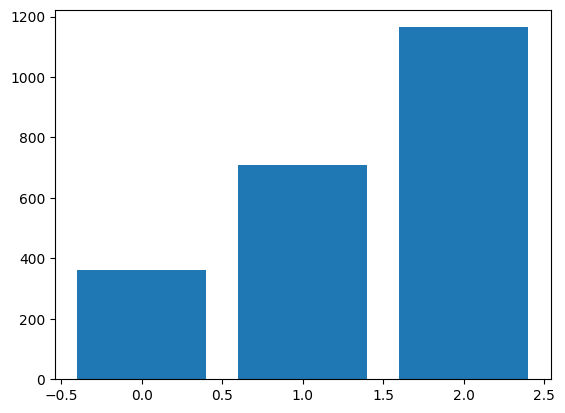

In [15]:
# merge the cluster dataset and df to create a combine dataset 
combine = pd.merge(create, df,on = 'item')
combine.columns
value = combine.groupby(0)[['calories']].mean()
value
# create a bar graph using the cluster as x axis and y as the average calories value
plt.bar(value.index,value['calories'])
plt.show()

In [18]:
combine

,0,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
item,,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,0,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
Single Bacon Smokehouse Burger,1,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
Double Bacon Smokehouse Burger,1,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
Grilled Bacon Smokehouse Chicken Sandwich,1,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
Crispy Bacon Smokehouse Chicken Sandwich,1,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Original Triple Double Crunchwrap,1,700,270,30,9.0,0.5,45,1550,85,9.0,7,23.0,15.0,6.0,25.0
Spicy Triple Double Crunchwrap,1,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0
Fiesta Taco Salad-Beef,1,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,0.0,0.0,0.0


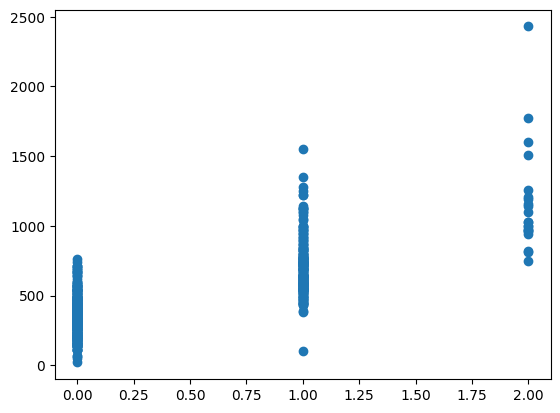

In [16]:
# # create a scatterplot  using the cluster as x axis and y as the average calories value
plt.scatter(combine[0],combine['calories'])
plt.show()